In [42]:
import pandas as pd
import numpy as np
df=pd.read_csv('database.csv')
df.head()
print(df['Weapon'].value_counts())
df['Victim Sex'].replace(to_replace=['Male','Female','Unknown'], value=[0,1,2],inplace=True)
df['Perpetrator Sex'].replace(to_replace=['Male','Female','Unknown'], value=[0,1,2],inplace=True)
df.head()

C:\Users\ankit\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Handgun          317484
Knife             94962
Blunt Object      67337
Firearm           46980
Unknown           33192
Shotgun           30722
Rifle             23347
Strangulation      8110
Fire               6173
Suffocation        3968
Gun                2206
Drugs              1588
Drowning           1204
Explosives          537
Poison              454
Fall                190
Name: Weapon, dtype: int64


,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,0,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,0,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,2,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,0,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,2,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI


In [26]:
target=df['Crime Solved']
df.drop(['Record ID','Record Source','Crime Solved'],axis=1,inplace=True)
df.drop('Agency Name',axis=1,inplace=True)
df.head()

,Agency Code,Agency Type,City,State,Year,Month,Incident,Crime Type,Victim Sex,Victim Age,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count
0,AK00101,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,0,14,Native American/Alaska Native,Unknown,0,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0
1,AK00101,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,0,43,White,Unknown,0,42,White,Unknown,Acquaintance,Strangulation,0,0
2,AK00101,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,1,30,Native American/Alaska Native,Unknown,2,0,Unknown,Unknown,Unknown,Unknown,0,0
3,AK00101,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,0,43,White,Unknown,0,42,White,Unknown,Acquaintance,Strangulation,0,0
4,AK00101,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,1,30,Native American/Alaska Native,Unknown,2,0,Unknown,Unknown,Unknown,Unknown,0,1


In [27]:
df=pd.concat([df,pd.get_dummies(df[['Crime Type','Perpetrator Race','Victim Ethnicity','Perpetrator Ethnicity']])],axis=1)
df.drop(['Crime Type','Perpetrator Race','Victim Ethnicity','Perpetrator Ethnicity'],axis=1,inplace=True)
df.head()

,Agency Code,Agency Type,City,State,Year,Month,Incident,Victim Sex,Victim Age,Victim Race,...,Perpetrator Race_Black,Perpetrator Race_Native American/Alaska Native,Perpetrator Race_Unknown,Perpetrator Race_White,Victim Ethnicity_Hispanic,Victim Ethnicity_Not Hispanic,Victim Ethnicity_Unknown,Perpetrator Ethnicity_Hispanic,Perpetrator Ethnicity_Not Hispanic,Perpetrator Ethnicity_Unknown
0,AK00101,Municipal Police,Anchorage,Alaska,1980,January,1,0,14,Native American/Alaska Native,...,0,1,0,0,0,0,1,0,0,1
1,AK00101,Municipal Police,Anchorage,Alaska,1980,March,1,0,43,White,...,0,0,0,1,0,0,1,0,0,1
2,AK00101,Municipal Police,Anchorage,Alaska,1980,March,2,1,30,Native American/Alaska Native,...,0,0,1,0,0,0,1,0,0,1
3,AK00101,Municipal Police,Anchorage,Alaska,1980,April,1,0,43,White,...,0,0,0,1,0,0,1,0,0,1
4,AK00101,Municipal Police,Anchorage,Alaska,1980,April,2,1,30,Native American/Alaska Native,...,0,0,1,0,0,0,1,0,0,1


In [28]:

def handle_non_numerical_data(df):
    columns=df.columns.values
    
    
    for column in columns:
        text_digit_vals={}
        def convert_to_int(val):
            return text_digit_vals[val]
        if df[column].dtype != np.int64 and df[column].dtype!=np.float64:
            column_contents = df[column].values.tolist()
            unique_elements=set(column_contents)
            x=0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique]=x
                    x=x+1
                    
            df[column]=list(map(convert_to_int,df[column]))
    return df       
        
df=handle_non_numerical_data(df)
print(df.head())
    

   Agency Code  Agency Type  City  State  Year  Month  Incident  Victim Sex  \
0         3510            6  1524     15  1980      3         1           0   
1         3510            6  1524     15  1980      4         1           0   
2         3510            6  1524     15  1980      4         2           1   
3         3510            6  1524     15  1980      8         1           0   
4         3510            6  1524     15  1980      8         2           1   

   Victim Age  Victim Race  ...  Perpetrator Race_Black  \
0          14            0  ...                       0   
1          43            2  ...                       0   
2          30            0  ...                       0   
3          43            2  ...                       0   
4          30            0  ...                       0   

   Perpetrator Race_Native American/Alaska Native  Perpetrator Race_Unknown  \
0                                               1                         0   
1           

In [29]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [30]:
df.corr()

,Agency Code,Agency Type,City,State,Year,Month,Incident,Victim Sex,Victim Age,Victim Race,...,Perpetrator Race_Black,Perpetrator Race_Native American/Alaska Native,Perpetrator Race_Unknown,Perpetrator Race_White,Victim Ethnicity_Hispanic,Victim Ethnicity_Not Hispanic,Victim Ethnicity_Unknown,Perpetrator Ethnicity_Hispanic,Perpetrator Ethnicity_Not Hispanic,Perpetrator Ethnicity_Unknown
Agency Code,1.000000,0.103292,-0.143456,-0.090396,-0.010385,0.000625,-0.033686,-0.014013,-0.000312,0.044023,...,0.036709,-0.015916,-0.008738,-0.023149,0.009402,0.012884,-0.018097,0.013194,0.013619,-0.019950
Agency Type,0.103292,1.000000,-0.052303,-0.014794,-0.017670,-0.000282,-0.029648,-0.073352,-0.044793,0.185044,...,0.115465,-0.030976,0.072092,-0.181671,0.040119,-0.000939,-0.024909,0.038431,-0.020314,-0.003290
City,-0.143456,-0.052303,1.000000,0.289149,-0.021894,-0.005135,0.048296,-0.017880,-0.003107,-0.099213,...,-0.080877,0.002416,0.037084,0.040088,0.149961,0.092348,-0.182787,0.106846,0.063416,-0.118725
State,-0.090396,-0.014794,0.289149,1.000000,-0.024607,-0.007445,0.134907,-0.022533,-0.007572,-0.123454,...,-0.114234,-0.023305,0.065252,0.048580,0.253529,0.112787,-0.268478,0.185897,0.059027,-0.159671
Year,-0.010385,-0.017670,-0.021894,-0.024607,1.000000,-0.000436,0.124125,-0.012848,0.005514,0.032040,...,-0.013317,0.000728,0.028805,-0.017751,0.001045,-0.200588,0.186991,-0.015306,-0.187653,0.180210
Month,0.000625,-0.000282,-0.005135,-0.007445,-0.000436,1.000000,-0.004962,0.003271,0.002394,-0.001968,...,-0.004310,-0.000724,0.006834,-0.002466,-0.004196,0.001698,0.001108,-0.005939,-0.000009,0.003386
Incident,-0.033686,-0.029648,0.048296,0.134907,0.124125,-0.004962,1.000000,-0.010997,-0.006918,0.026817,...,0.002541,-0.014878,0.021960,-0.019052,-0.044559,-0.107098,0.128837,-0.035858,-0.089755,0.102425
Victim Sex,-0.014013,-0.073352,-0.017880,-0.022533,-0.012848,0.003271,-0.010997,1.000000,0.138596,-0.112426,...,-0.034107,0.006239,-0.072725,0.099465,-0.078468,0.025774,0.026323,-0.033355,0.031990,-0.010268
Victim Age,-0.000312,-0.044793,-0.003107,-0.007572,0.005514,0.002394,-0.006918,0.138596,1.000000,-0.049679,...,-0.041795,-0.002604,0.036889,0.007890,-0.041312,-0.004294,0.030571,-0.031693,-0.009558,0.026760
Victim Race,0.044023,0.185044,-0.099213,-0.123454,0.032040,-0.001968,0.026817,-0.112426,-0.049679,1.000000,...,0.509016,-0.139554,0.080972,-0.537295,-0.304297,0.035125,0.162728,-0.207364,-0.018262,0.134622


In [31]:
X=df.values
X[0:5]

array([[3510,    6, 1524,   15, 1980,    3,    1,    0,   14,    0,    0,
          15,    1,   11,    0,    0,    0,    1,    0,    0,    1,    0,
           0,    0,    0,    1,    0,    0,    1],
       [3510,    6, 1524,   15, 1980,    4,    1,    0,   43,    2,    0,
          42,    1,   14,    0,    0,    0,    1,    0,    0,    0,    0,
           1,    0,    0,    1,    0,    0,    1],
       [3510,    6, 1524,   15, 1980,    4,    2,    1,   30,    0,    2,
           0,    2,    2,    0,    0,    0,    1,    0,    0,    0,    1,
           0,    0,    0,    1,    0,    0,    1],
       [3510,    6, 1524,   15, 1980,    8,    1,    0,   43,    2,    0,
          42,    1,   14,    0,    0,    0,    1,    0,    0,    0,    0,
           1,    0,    0,    1,    0,    0,    1],
       [3510,    6, 1524,   15, 1980,    8,    2,    1,   30,    0,    2,
           0,    2,    2,    0,    1,    0,    1,    0,    0,    0,    1,
           0,    0,    0,    1,    0,    0,    1]], dtyp

In [32]:
Y=target.values
Y[0:5]

array(['Yes', 'Yes', 'No', 'Yes', 'No'], dtype=object)

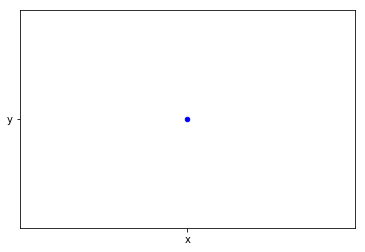

In [11]:
x=df['City'].values
y=df['Month'].values
plt.scatter('x','y',s=20,color='b')
plt.show()

In [33]:
from sklearn import preprocessing
X=preprocessing .StandardScaler().fit(X).transform(X)
X[0:5]

C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-0.84520546,  0.52591612,  1.01459126, -1.15073201, -1.59161995,
        -0.71168314, -0.23839375, -0.53813623, -0.50526987, -2.80099995,
        -0.74404497, -0.31459367, -0.7353104 ,  1.25259953, -0.22935892,
        -0.31635443, -0.1203539 ,  0.1203539 , -0.0977767 , -0.71134236,
        13.27591282, -0.66568551, -0.72067002, -0.35833691, -0.66924528,
         0.85644733, -0.28148112, -0.54249257,  0.65589363],
       [-0.84520546,  0.52591612,  1.01459126, -1.15073201, -1.59161995,
        -0.42441316, -0.23839375, -0.53813623,  0.19137204, -0.88258125,
        -0.74404497,  0.68684686, -0.7353104 ,  2.10082214, -0.22935892,
        -0.31635443, -0.1203539 ,  0.1203539 , -0.0977767 , -0.71134236,
        -0.07532439, -0.66568551,  1.38759762, -0.35833691, -0.66924528,
         0.85644733, -0.28148112, -0.54249257,  0.65589363],
       [-0.84520546,  0.52591612,  1.01459126, -1.15073201, -1.59161995,
        -0.42441316, -0.22754185,  1.8262443 , -0.12091571, -2.80099995,
  

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=4)


In [37]:
from sklearn import svm
SVM_model = svm.SVC()
SVM_model.fit(X_train, Y_train)

C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [39]:
yhat=SVM_model.predict(X_test)
yhat[0:5]


array(['No', 'Yes', 'No', 'Yes', 'Yes'], dtype=object)

In [40]:
accuracy=SVM_model.score(X_test,Y_test)
print(accuracy)

0.9995849355083757


In [41]:
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score
scr=f1_score(Y_test,yhat, average='weighted')
print(scr)
jrscore=jaccard_similarity_score(Y_test,yhat)
print(jrscore)

0.9995849620532427
0.9995849355083757


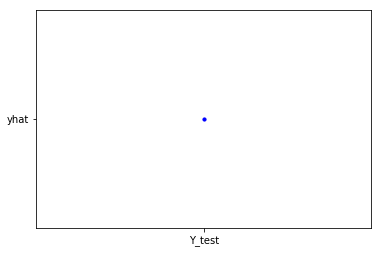

In [22]:
plt.scatter('Y_test','yhat',s=10,color='b')
plt.show()